In [ ]:
'''绘制数据集的图片概览'''
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
fig=plt.figure(dpi=200,figsize=(6,6))
fig.subplots_adjust(left=1,right=2,bottom=0,top=1,hspace=0.05,wspace=0.05)
digits=load_digits()
plt.rcParams['font.family']=['SimHei']
plt.title('手写数字图片',size=14)
plt.xticks([])
plt.yticks([])
for i in range(64):
    ax=fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary)
    ax.text(0,7,str(digits.target[i]))
plt.show()


In [ ]:
'''逻辑回归函数手动平面调参，图像绘制，报表生成'''
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,ParameterGrid
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
import numpy as np
data=load_digits()
X=data.data
y=data.target
x=StandardScaler().fit_transform(X)
# y=label_binarize(y,classes=list(range(10)))
model=LogisticRegression(random_state=42,multi_class='ovr',max_iter=100000)
params={}
# params['penalty']=['l1','l2','elasticnet','none']
# params['l1_ratio']=np.array(range(10))/10
params['C']=np.array(range(1,5))
params['solver']=['liblinear','lbfgs','newton-cg','sag','saga']
# params=ParameterGrid(params)
clf=GridSearchCV(model,params,return_train_score=True,cv=5,error_score=0,n_jobs=-1)
clf.fit(x,y)

In [ ]:
'''到处交叉验证结果'''
result=clf.cv_results_


In [ ]:
'''提取并分析验证结果'''
for p,s in zip(result['params'],result['mean_test_score']):
    print(p,s)

In [ ]:
'''数据处理并分析结果'''
import pandas as pd
panda_result=pd.DataFrame.from_dict(result)


In [ ]:
import pandas as pd
panda_result=pd.DataFrame.from_dict(result)
panda_result.to_excel('panda_data3.xls')

In [ ]:
result=clf.cv_results_
test1=np.array(result['param_C']==1)
test2=np.array(result['param_solver']=='sag')
print(test1)
print(test2)
test3=~((~test1)+(~test2))

In [ ]:
print(panda_result['param_solver'])

In [ ]:
result2=clf.cv_results_
result3=pd.DataFrame.from_dict(result2)
with open('like.csv','w') as f:
    result3.to_csv(f)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,ElasticNet
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
from likefunctions_boston import plotlikeconfig
from MNIST_HELLOWORLD.likedigitclass import DigitEnsembleClassifier
model=LogisticRegression(random_state=42,multi_class='ovr',max_iter=100000)
params={}
params['solver']=['saga','lbfgs']
params['C']=list(range(1,3))
params['penalty']=['l1','l2']
clf=DigitEnsembleClassifier(model=model,paramset=params,cv=3)
clf.export('test')
xlabel='C'
plotlikeconfig(xlabel=xlabel)
plt.grid()
x,y,label1=clf.linedata(xlabel=xlabel,const_param1='solver',paramvalue1='saga',const_param2='penalty',
            paramvalue2='l2',target='mean_train_score')
plt.plot(x,y)
x,y,label2=clf.linedata(xlabel=xlabel,const_param1='solver',paramvalue1='saga',const_param2='penalty',
            paramvalue2='l2',target='mean_test_score')
lable=[label1,label2]
plt.legend(lable)
plt.show()

In [ ]:
xlabel='C'
plotlikeconfig(xlabel=xlabel)
plt.grid()
x,y,label1=clf.linedata(xlabel=xlabel,const_param1='solver',paramvalue1='saga',const_param2='penalty',
            paramvalue2='l2',target='mean_train_score')
plt.plot(x,y)
x,y,label2=clf.linedata(xlabel=xlabel,const_param1='solver',paramvalue1='saga',const_param2='penalty',
            paramvalue2='l2',target='mean_test_score')
plt.plot(x,y)
lable=[label1,label2]
plt.legend(lable)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,ElasticNet
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
from likefunctions_boston import plotlikeconfig
from MNIST_HELLOWORLD.likedigitclass import DigitEnsembleClassifier
model=LogisticRegression(random_state=42,multi_class='ovr',max_iter=100000,class_weight='balanced')
params={}
params['solver']=['saga','lbfgs','sag','newton-cg','liblinear']
params['C']=list(range(1,10,2))
params['penalty']=['l1','l2','none']
clf=DigitEnsembleClassifier(model=model,paramset=params,cv=3)
clf.export('test')

In [ ]:
xlabel='C'
plotlikeconfig(xlabel=xlabel)
plt.grid()
x,y,label1=clf.linedata(xlabel=xlabel,const_param1='solver',paramvalue1='saga',const_param2='penalty',
            paramvalue2='l2',target='mean_train_score')
plt.plot(x,y)
x,y,label2=clf.linedata(xlabel=xlabel,const_param1='solver',paramvalue1='saga',const_param2='penalty',
            paramvalue2='l2',target='mean_test_score')
plt.plot(x,y)
label1=label1+'\nTraing'
label2=label2+'\nTesting'
lable=[label1,label2]
plt.xlim(min(x),max(x))
plt.legend(lable)
plt.show()

In [ ]:
'''输出图片为不同惩罚项下惩罚强度对预测效果的影响'''
from likefunctions_boston import plotlikeconfig
from MNIST_HELLOWORLD.likedigitclass import linedata
from matplotlib import pyplot as plt

xlabel='C'
plotlikeconfig(xlabel=xlabel,ylabel='Accuracy(%)')
plt.grid()
C=['l1','l2','none']
label=[]
ax=plt.gca()
for i in C:
    x,y,label_temp=linedata(xlabel=xlabel,const_param1='solver',paramvalue1='saga',const_param2='penalty',
            paramvalue2=i,target='mean_train_score')
    plt.plot(x,y*100)
    label.append(label_temp)
    x,y,label_temp=linedata(xlabel=xlabel,const_param1='solver',paramvalue1='saga',const_param2='penalty',
            paramvalue2=i,target='mean_test_score')
    plt.plot(x,y*100)
    label.append(label_temp)
plt.xlim(min(x),max(x))
plt.legend(label,fontsize=5)
plt.show()


In [ ]:
'''读取生成数据并在saga求解器下比较不同惩罚项下随C值变动情况'''
from likefunctions_boston import plotlikeconfig
from MNIST_HELLOWORLD.likedigitclass import linedata
from matplotlib import pyplot as plt

xlabel='C'
plotlikeconfig(xlabel=xlabel,ylabel='Accuracy(%)')
plt.grid()
C=['saga','sag','lbfgs','newton-cg','liblinear']
label=[]
for i in C:
    x,y,label_temp=linedata(xlabel=xlabel,const_param1='solver',paramvalue1='saga',const_param2='penalty',
            paramvalue2=i,target='mean_train_score')
    plt.plot(x,y*100)
    label.append(label_temp)
    x,y,label_temp=linedata(xlabel=xlabel,const_param1='solver',paramvalue1='saga',const_param2='penalty',
            paramvalue2=i,target='mean_test_score')
    plt.plot(x,y*100)
    label.append(label_temp)
plt.xlim(min(x),max(x))
plt.legend(label,fontsize=5)
plt.show()

In [ ]:
'''读取生成数据并在C=1,不同惩罚项下比较各求解器的耗时情况'''
from likefunctions_boston import plotlikeconfig
from MNIST_HELLOWORLD.likedigitclass import linedata
from matplotlib import pyplot as plt
import numpy as np
xlabel='solver'
plotlikeconfig(xlabel=xlabel,ylabel='Time Consuming(sec)')
plt.grid()
C=['l2','l1','none']
label=[]
width=0.1
column=width
for idx,i in enumerate(C):
    x,y,label_temp=linedata(xlabel=xlabel,const_param1='C',paramvalue1=1,const_param2='penalty',
            paramvalue2=i,target='mean_fit_time')
    x=np.array(x)
    y=np.array(y)
    plt.bar(np.array(range(len(x)))+idx*column,y,width=width,label=label_temp)
    # label.append(label_temp)
plt.xticks(np.array(range(len(x)))+float(column*float(len(C))/2),x)
# plt.xlim(min(x),max(x))
plt.legend(loc='upper right',fontsize=5)
plt.show()

In [ ]:
'''针对逻辑回归模型，进行一次更为精细的调参，主要细化了的参数为惩罚项C的大小'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,ElasticNet
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
from likefunctions_boston import plotlikeconfig
from MNIST_HELLOWORLD.likedigitclass import DigitEnsembleClassifier
model=LogisticRegression(random_state=42,multi_class='ovr',max_iter=100000,class_weight='balanced')
params={}
params['solver']=['saga','lbfgs','sag','newton-cg','liblinear']
params['C']=np.array(range(1,10,2))/10
params['penalty']=['l1','l2','none']
clf=DigitEnsembleClassifier(model=model,paramset=params,cv=3)
clf.export('test')



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from MNIST_HELLOWORLD.likedigitclass import DigitEnsembleClassifier
model=DecisionTreeClassifier(random_state=42,class_weight='balanced')
params={}
params['criterion']=['gini','entropy']
params['max_depth']=np.array(range(1,20))
params['min_impurity_decrease']=np.array(range(0,10))/10
clf=DigitEnsembleClassifier(model=model,paramset=params,cv=3)
clf.export('DecisionTree')


In [ ]:
clf.clf.best_params_

In [ ]:
'''该部分用于输出决策树各种参数下的性能变动趋势'''
from likefunctions_boston import plotlikeconfig
from MNIST_HELLOWORLD.likedigitclass import linedata
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import cm
xlabel='max_depth'
plotlikeconfig(xlabel=xlabel,ylabel='Accuracy(%)',dpi=300)
plt.grid()
C=['gini','entropy']
for i in C:
    x,y,label_temp=linedata(name='DecisionTree',xlabel=xlabel,const_param1='min_impurity_decrease',paramvalue1=0,const_param2='criterion',
            paramvalue2=i,target='mean_train_score')
    plt.plot(x,y*100,label=label_temp)
    x,y,label_temp=linedata(name='DecisionTree',xlabel=xlabel,const_param1='min_impurity_decrease',paramvalue1=0,const_param2='criterion',
            paramvalue2=i,target='mean_test_score')
    plt.plot(x,y*100,label=label_temp)
plt.xlim(min(x),max(x))
plt.legend(loc='upper right',fontsize=3)
plt.plot()

In [ ]:
'''该部分用于随机森林调参'''
from sklearn.ensemble import RandomForestClassifier
from MNIST_HELLOWORLD.likedigitclass import DigitEnsembleClassifier
import numpy as np
model=RandomForestClassifier(random_state=42,class_weight='balanced')
params={}
params['criterion']=['gini','entropy']
params['n_estimators']=np.array(range(1,100,10))
params['max_depth']=np.append(np.array(range(3,20,1)),None)
clf=DigitEnsembleClassifier(model=model,paramset=params,cv=3)
clf.export('RandomForest')



In [ ]:
'''该部分用于输出随机森林下的一些性能图像'''
from likefunctions_boston import plotlikeconfig
from MNIST_HELLOWORLD.likedigitclass import linedata
from matplotlib import pyplot as plt

xlabel='max_depth'
plotlikeconfig(xlabel=xlabel,ylabel='Accuracy(%)',dpi=300)
plt.grid()
C=['gini','entropy']
for i in C:
    x,y,label_temp=linedata(name='RandomForest',xlabel=xlabel,const_param1='n_estimators',paramvalue1=61,const_param2='criterion',
            paramvalue2=i,target='mean_train_score')
    plt.plot(x,y*100,label=label_temp)
    x,y,label_temp=linedata(name='RandomForest',xlabel=xlabel,const_param1='n_estimators',paramvalue1=61,const_param2='criterion',
            paramvalue2=i,target='mean_test_score')
    plt.plot(x,y*100,label=label_temp)
plt.xlim(min(x),max(x))
plt.legend(loc='lower right',fontsize=5)
plt.show()

In [ ]:
'''该部分用于XGBoost部分调参'''
from xgboost import XGBClassifier
from MNIST_HELLOWORLD.likedigitclass import DigitEnsembleClassifier
import numpy as np
model=XGBClassifier(random_state=42,class_weight='balanced')
params={}
params['n_estimators']=range(1,200,20)
params['max_depth']=np.array(range(1,10,2))
params['gamma']=np.array(range(0,5,1))/5
clf=DigitEnsembleClassifier(model=model,paramset=params,cv=3)
clf.export('XGBoostClassifier')



In [ ]:

'''该部分用于输出XGBoost各种参数下的性能变动线图'''
from likefunctions_boston import plotlikeconfig
from MNIST_HELLOWORLD.likedigitclass import linedata
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import cm
xlabel='n_estimators'
plotlikeconfig(xlabel=xlabel,ylabel='Accuracy(%)',dpi=300)
plt.grid()
C=np.array(range(0,5,1))/5
for i in C:
    x,y,label_temp=linedata(name='XGBoostClassifier',xlabel=xlabel,const_param1='max_depth',paramvalue1=5,const_param2='gamma',
            paramvalue2=i,target='mean_train_score')
    plt.plot(x,y*100,label=label_temp)
    x,y,label_temp=linedata(name='XGBoostClassifier',xlabel=xlabel,const_param1='max_depth',paramvalue1=5,const_param2='gamma',
            paramvalue2=i,target='mean_test_score')
    plt.plot(x,y*100,label=label_temp)
plt.xlim(min(x),max(x))
plt.legend(loc='upper right',fontsize=3)
plt.plot()

In [ ]:
'''该部分用于支持向量机部分调参'''
from sklearn.svm import SVC
from MNIST_HELLOWORLD.likedigitclass import DigitEnsembleClassifier
import numpy as np
model=SVC(random_state=42,class_weight='balanced')
params={}
params['C']=np.array(range(1,201))/10
params['kernel']=['rbf','linear','poly','sigmoid']
params['degree']=range(2,7)
clf=DigitEnsembleClassifier(model=model,paramset=params,cv=3)
clf.export('SVC_test3')

In [ ]:
'''该部分用于输出支持向量机各种参数下的性能变动线图'''
from likefunctions_boston import plotlikeconfig
from MNIST_HELLOWORLD.likedigitclass import linedata
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import cm
xlabel='C'
plotlikeconfig(xlabel=xlabel,ylabel='Accuracy(%)',title='C_Poly_Degree',dpi=300)
plt.grid()
C=range(2,7)
for i in C:
    x,y,label_temp=linedata(name='SVC_test2',xlabel=xlabel,const_param1='kernel',paramvalue1='poly',const_param2='degree',
            paramvalue2=i,target='mean_train_score')
    # plt.plot(x,y*100,label=label_temp)
    x,y,label_temp=linedata(name='SVC_test2',xlabel=xlabel,const_param1='kernel',paramvalue1='poly',const_param2='degree',
            paramvalue2=i,target='mean_test_score')
    plt.plot(x,y*100,label=label_temp)
plt.xlim(min(x),max(x))
plt.legend(loc='upper right',fontsize=5)
plt.show()

In [ ]:
'''该段用于神经网络分类器的优化'''
from sklearn.neural_network import MLPClassifier
from MNIST_HELLOWORLD.likedigitclass import DigitEnsembleClassifier
import numpy as np
model=MLPClassifier(random_state=42,max_iter=2000)
params={}
params['activation']=['identity','logistic','tanh','relu']
params['solver']=['adam','sgd','lbfgs']
params['hidden_layer_sizes']=[[int(64*1.2**j) for j in range(1,i+1) ] for i in range(1,7)]
clf=DigitEnsembleClassifier(model=model,paramset=params,cv=3)
clf.export('MPLC')


In [ ]:
'''该部分用于神经网络各种参数下的性能变动线图'''
from likefunctions_boston import plotlikeconfig
from MNIST_HELLOWORLD.likedigitclass import linedata
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import cm
xlabel='hidden_layer_sizes'
plotlikeconfig(xlabel=xlabel,ylabel='Accuracy(%)',title='adam',dpi=300)
plt.grid()
C=['identity','tanh','relu','logistic']
xx=list(range(1,7))
for i in C:
    x,y,label_temp=linedata(name='MPLC',xlabel=xlabel,const_param1='solver',paramvalue1='adam',const_param2='activation',
            paramvalue2=i,target='mean_train_score')
    # plt.plot(xx,y*100,label=label_temp)
    x,y,label_temp=linedata(name='MPLC',xlabel=xlabel,const_param1='solver',paramvalue1='adam',const_param2='activation',
            paramvalue2=i,target='mean_test_score')
    plt.plot(xx,y*100,label=label_temp)
plt.xlim(min(xx),3)
plt.legend(loc='lower left',fontsize=7)
plt.show()

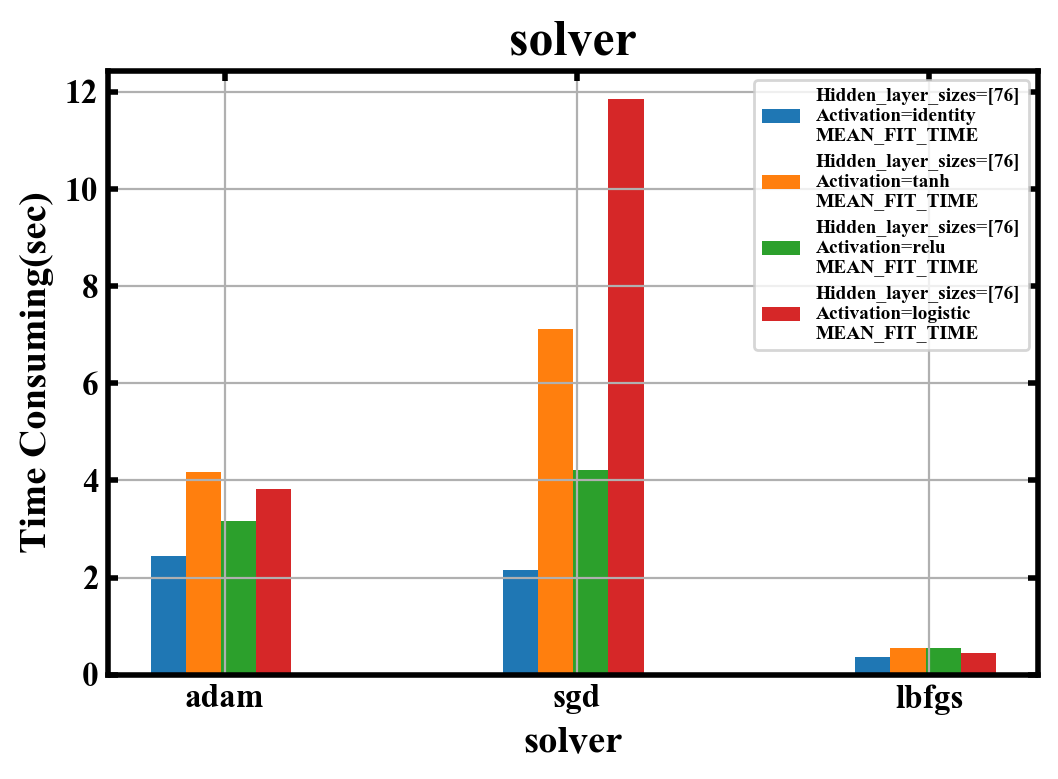

In [9]:
'''读取生成数据并在不同的求解器条件下比较各激活函数的耗时情况,以求解器作为主要区分'''
from likefunctions_boston import plotlikeconfig
from MNIST_HELLOWORLD.likedigitclass import linedata
from matplotlib import pyplot as plt
import numpy as np
xlabel='solver'
plotlikeconfig(xlabel=xlabel,ylabel='Time Consuming(sec)',title='solver')
plt.grid()
C=['identity','tanh','relu','logistic']
width=0.1
column=width
for idx,i in enumerate(C):
    x,y,label_temp=linedata(name='MPLC',xlabel=xlabel,const_param1='hidden_layer_sizes',paramvalue1='[76]',const_param2='activation',
            paramvalue2=i,target='mean_fit_time')
    x=np.array(x)
    y=np.array(y)
    plt.bar(np.array(range(len(x)))+idx*column,y,width=width,label=label_temp)
plt.xticks(np.array(range(len(x)))+float(column*len(C))/2.5,x)
plt.tick_params(bottom=False)
plt.legend(loc='upper right',fontsize=7)
plt.show()

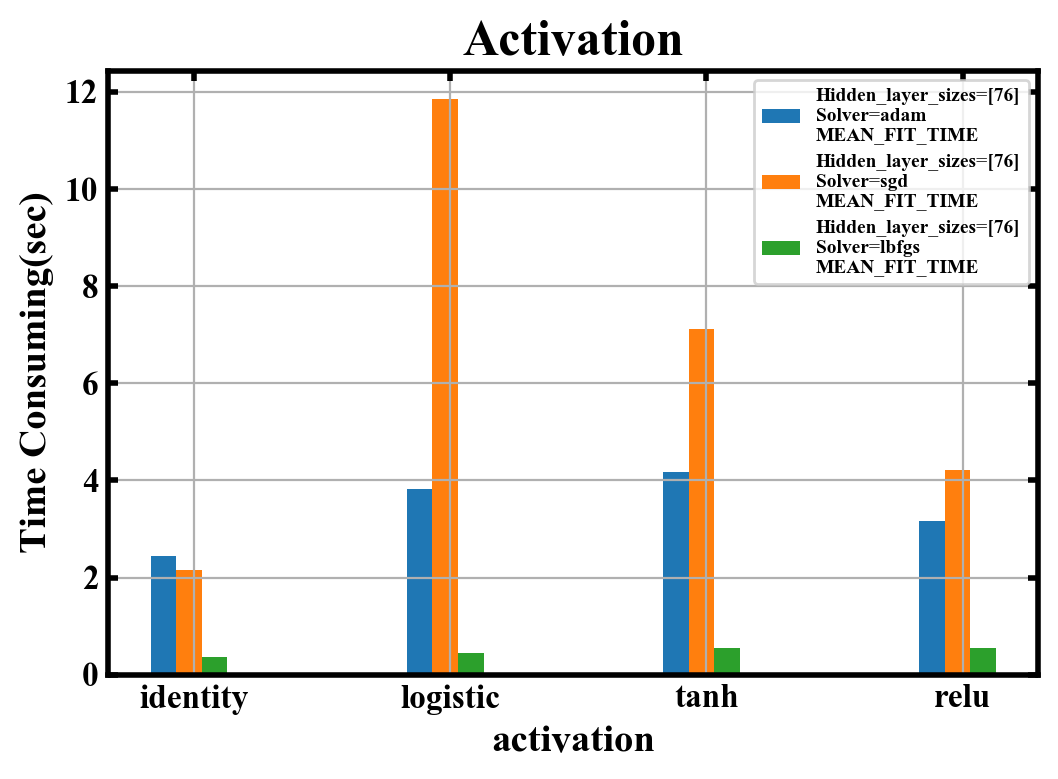

In [12]:
'''读取生成数据并在不同的激活函数比较各求解器的耗时情况,以激活函数作为主要区分'''
from likefunctions_boston import plotlikeconfig
from MNIST_HELLOWORLD.likedigitclass import linedata
from matplotlib import pyplot as plt
import numpy as np
xlabel='activation'
plotlikeconfig(xlabel=xlabel,ylabel='Time Consuming(sec)',title='Activation')
plt.grid()
C=['adam','sgd','lbfgs']
width=0.1
column=width
for idx,i in enumerate(C):
    x,y,label_temp=linedata(name='MPLC',xlabel=xlabel,const_param1='hidden_layer_sizes',paramvalue1='[76]',const_param2='solver',
            paramvalue2=i,target='mean_fit_time')
    x=np.array(x)
    y=np.array(y)
    plt.bar(np.array(range(len(x)))+idx*column,y,width=width,label=label_temp)
plt.xticks(np.array(range(len(x)))+float(column*len(C))/2.5,x)
plt.tick_params(bottom=False)
plt.legend(loc='upper right',fontsize=7)
plt.show()

